In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)


In [3]:
df = pd.read_csv('Data/Part_1_Crime_Data.csv',low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601173 entries, 0 to 601172
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                600098 non-null  float64
 1   Y                600098 non-null  float64
 2   RowID            601173 non-null  int64  
 3   CCNumber         601173 non-null  object 
 4   CrimeDateTime    601173 non-null  object 
 5   CrimeCode        601173 non-null  object 
 6   Description      601173 non-null  object 
 7   Inside_Outside   0 non-null       float64
 8   Weapon           148970 non-null  object 
 9   Post             593160 non-null  float64
 10  Gender           504638 non-null  object 
 11  Age              484542 non-null  float64
 12  Race             578562 non-null  object 
 13  Ethnicity        73486 non-null   object 
 14  Location         598096 non-null  object 
 15  Old_District     563500 non-null  object 
 16  New_District     29656 non-null   obje

,X,Y,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
0,-76.572136,39.299299,1,22B07631,2022/02/26 04:00:00+00,5B,BURGLARY,NaN,NaN,334.0,NaN,NaN,NaN,NaN,3200 E MONUMENT ST,EASTERN,NaN,ORANGEVILLE INDUSTRIAL AREA,39.299299,-76.572136,"(39.299298999999998,-76.572136)",NaN,1
1,-76.577016,39.284135,2,22B07176,2022/02/26 07:24:00+00,6C,LARCENY,NaN,NaN,214.0,NaN,NaN,NaN,NaN,2800 FOSTER AVE,SOUTHEAST,NaN,CANTON,39.284135,-76.577016,"(39.284134999999999,-76.577016)",NaN,1
2,-76.644308,39.271358,3,22B07181,2022/02/26 05:40:00+00,5F,BURGLARY,NaN,NaN,941.0,NaN,NaN,NaN,NaN,1300 WESTERN AVE,SOUTHERN,NaN,CARROLL - CAMDEN INDUSTRIAL AREA,39.271358,-76.644308,"(39.271357999999999,-76.644307999999995)",NaN,1
3,-76.560956,39.308166,4,22B07215,2022/02/26 11:25:00+00,3CF,ROBBERY - COMMERCIAL,NaN,FIREARM,433.0,NaN,NaN,NaN,NaN,4700 ERDMAN AVE,NORTHEAST,NaN,ARMISTEAD GARDENS,39.308166,-76.560956,"(39.308166,-76.560956000000004)",NaN,1
4,-76.544464,39.371811,5,22B07329,2022/02/26 00:25:00+00,5F,BURGLARY,NaN,NaN,424.0,NaN,NaN,NaN,NaN,7600 HARFORD RD,NORTHEAST,NaN,NORTH HARFORD ROAD,39.371811,-76.544464,"(39.371811000000001,-76.544464000000005)",NaN,1


In [4]:
test_date = df.loc[0, 'CrimeDateTime']
test_date


'2022/02/26 04:00:00+00'

In [5]:
test_datetime = pd.to_datetime(test_date)
test_datetime


Timestamp('2022-02-26 04:00:00+0000', tz='UTC')

## Preparing the Date Time Index

In [6]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'])


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1202-05-21 13:03:59 present at position 394176

In [7]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'],errors='coerce')


In [8]:
# how many null values did we create?
df['CrimeDateTime'].isna().sum()


3

In [9]:
# drop the single erroneous time
df = df.dropna(subset=['CrimeDateTime'])
df['CrimeDateTime'].isna().sum()


0

In [10]:
## now that we remove NaT's let's make our datetime index
df = df.set_index('CrimeDateTime')
df.head(3)

,X,Y,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,,,,
2022-02-26 04:00:00+00:00,-76.572136,39.299299,1,22B07631,5B,BURGLARY,NaN,NaN,334.0,NaN,NaN,NaN,NaN,3200 E MONUMENT ST,EASTERN,NaN,ORANGEVILLE INDUSTRIAL AREA,39.299299,-76.572136,"(39.299298999999998,-76.572136)",NaN,1
2022-02-26 07:24:00+00:00,-76.577016,39.284135,2,22B07176,6C,LARCENY,NaN,NaN,214.0,NaN,NaN,NaN,NaN,2800 FOSTER AVE,SOUTHEAST,NaN,CANTON,39.284135,-76.577016,"(39.284134999999999,-76.577016)",NaN,1
2022-02-26 05:40:00+00:00,-76.644308,39.271358,3,22B07181,5F,BURGLARY,NaN,NaN,941.0,NaN,NaN,NaN,NaN,1300 WESTERN AVE,SOUTHERN,NaN,CARROLL - CAMDEN INDUSTRIAL AREA,39.271358,-76.644308,"(39.271357999999999,-76.644307999999995)",NaN,1


In [11]:
df = df.sort_index()
df.index


DatetimeIndex(['1920-06-18 01:30:01+00:00', '1922-06-22 13:00:01+00:00',
               '1963-10-30 00:00:01+00:00', '1966-01-01 01:00:01+00:00',
               '1969-07-20 21:00:01+00:00', '1970-06-15 00:01:00+00:00',
               '1973-07-01 23:00:00+00:00', '1975-06-01 00:00:00+00:00',
               '1976-09-01 01:01:00+00:00', '1977-05-01 00:01:00+00:00',
               ...
               '2024-02-03 19:00:00+00:00', '2024-02-03 19:10:00+00:00',
               '2024-02-03 19:15:00+00:00', '2024-02-03 19:30:00+00:00',
               '2024-02-03 19:40:00+00:00', '2024-02-03 19:48:00+00:00',
               '2024-02-03 19:50:00+00:00', '2024-02-03 20:00:00+00:00',
               '2024-02-03 20:20:00+00:00', '2024-02-03 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=601170, freq=None)

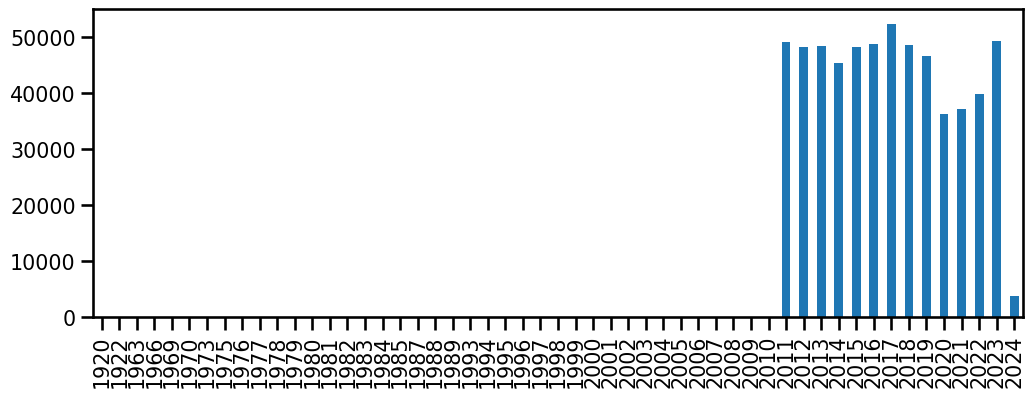

In [12]:
years = df.index.year
years.value_counts().sort_index().plot(kind='bar');

In [13]:
## keeping 2011 to present
df = df.loc['2011':]
df.index


DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-01 00:00:00+00:00',
               '2011-01-01 00:00:00+00:00', '2011-01-01 00:01:00+00:00',
               '2011-01-01 00:01:00+00:00', '2011-01-01 00:05:00+00:00',
               '2011-01-01 00:05:00+00:00', '2011-01-01 00:05:00+00:00',
               '2011-01-01 00:10:00+00:00', '2011-01-01 00:15:00+00:00',
               ...
               '2024-02-03 19:00:00+00:00', '2024-02-03 19:10:00+00:00',
               '2024-02-03 19:15:00+00:00', '2024-02-03 19:30:00+00:00',
               '2024-02-03 19:40:00+00:00', '2024-02-03 19:48:00+00:00',
               '2024-02-03 19:50:00+00:00', '2024-02-03 20:00:00+00:00',
               '2024-02-03 20:20:00+00:00', '2024-02-03 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=601005, freq=None)

## Inspecting the Data Format

<Axes: >

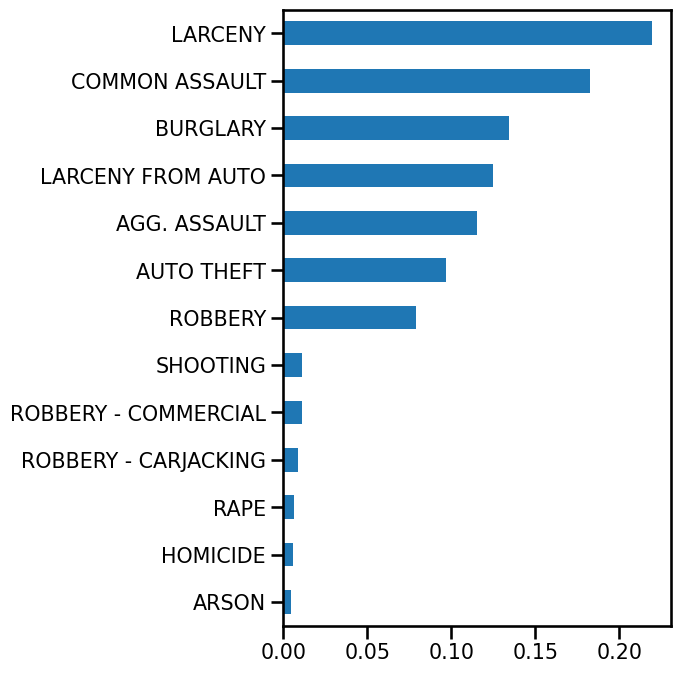

In [14]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Description'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8))

In [15]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Description'].value_counts().to_frame('Total # of Crimes')
crime_counts

,Total # of Crimes
LARCENY,132022
COMMON ASSAULT,109669
BURGLARY,80868
LARCENY FROM AUTO,74992
AGG. ASSAULT,69263
AUTO THEFT,58084
ROBBERY,47537
SHOOTING,6682
ROBBERY - COMMERCIAL,6539
ROBBERY - CARJACKING,5393


In [16]:
# display with an inline-barplot inside your df
crime_counts.style.bar('Total # of Crimes')

,Total # of Crimes
LARCENY,132022
COMMON ASSAULT,109669
BURGLARY,80868
LARCENY FROM AUTO,74992
AGG. ASSAULT,69263
AUTO THEFT,58084
ROBBERY,47537
SHOOTING,6682
ROBBERY - COMMERCIAL,6539
ROBBERY - CARJACKING,5393


## Using Dictionaries and Loops to Prepare Time Series

In [17]:
## demoing groupby with .counts() vs .size()
df.groupby("Description").count().head()


,X,Y,RowID,CCNumber,CrimeCode,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
Description,,,,,,,,,,,,,,,,,,,,,
AGG. ASSAULT,69140,69140,69263,69263,69263,0,68491,68311,66260,64783,68520,11595,68814,65257,3054,68247,69140,69140,69263,49989,69263
ARSON,2597,2597,2604,2604,2604,0,2292,2557,1963,1554,2474,182,2594,2471,86,2555,2597,2597,2604,2154,2604
AUTO THEFT,57940,57940,58084,58084,58084,0,77,57168,52469,51385,55054,13435,57643,49696,7467,57120,57940,57940,58084,44935,58084
BURGLARY,80817,80817,80868,80868,80868,0,240,80400,62167,56712,77271,4855,80736,78161,2239,80383,80817,80817,80868,68475,80868
COMMON ASSAULT,109502,109502,109669,109669,109669,0,21502,108426,105131,101461,108374,17894,109110,103321,5103,108338,109502,109502,109669,80926,109669


In [18]:
df.groupby("Description").size().head()


Description
AGG. ASSAULT       69263
ARSON               2604
AUTO THEFT         58084
BURGLARY           80868
COMMON ASSAULT    109669
dtype: int64

 Notice that our .size() results match the "Total Incidents". It produced the same final answer, but with a much cleaner output.

## Testing 1 crime first

In [19]:
## making our dictionary 
CRIMES = {}


In [20]:
## Lets test 1 crime before we create our loop
crime ='ROBBERY'
crime


'ROBBERY'

In [21]:
# I. Save a temp df of just the rows that match the crime
temp = df.loc[ df['Description']==crime]
temp.head(3)

,X,Y,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 02:45:00+00:00,-76.593990,39.297354,399070,11A00126,3AF,ROBBERY,NaN,FIREARM,321.0,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NaN,600 BROADWAY,EASTERN,NaN,DUNBAR-BROADWAY,39.297354,-76.593990,"(39.297354,-76.59399)",STREET,1
2011-01-01 04:25:00+00:00,-76.658482,39.342387,399635,11A00157,3B,ROBBERY,NaN,NaN,532.0,F,23.0,BLACK_OR_AFRICAN_AMERICAN,NaN,2500 EDGECOMBE CIR N,NORTHERN,NaN,PARKLANE,39.342387,-76.658482,"(39.342387,-76.658482)",APT/CONDO - OCCUPIED,1
2011-01-01 04:55:00+00:00,-76.598510,39.292969,401894,11A00161,3B,ROBBERY,NaN,NaN,212.0,M,55.0,BLACK_OR_AFRICAN_AMERICAN,NaN,1400 E FAYETTE ST,SOUTHEAST,NaN,DUNBAR-BROADWAY,39.292969,-76.598510,"(39.292968763700166,-76.598509626981652)",STREET,1


In [22]:
# II. Resample the temp DataFrame as Daily data (crime counts)
# and keep ONLY the .size()
temp_res = temp.resample("D").size()
temp_res


CrimeDateTime
2011-01-01 00:00:00+00:00     5
2011-01-02 00:00:00+00:00    10
2011-01-03 00:00:00+00:00     9
2011-01-04 00:00:00+00:00     4
2011-01-05 00:00:00+00:00     6
                             ..
2024-01-30 00:00:00+00:00    10
2024-01-31 00:00:00+00:00    16
2024-02-01 00:00:00+00:00     9
2024-02-02 00:00:00+00:00     6
2024-02-03 00:00:00+00:00     3
Freq: D, Length: 4782, dtype: int64

In [23]:
#III. Save the temporary DataFrame in the dictionary, #using the crime description as the key.
CRIMES[crime] = temp_res.copy()
CRIMES.keys()


dict_keys(['ROBBERY'])

In [24]:
CRIMES['ROBBERY']


CrimeDateTime
2011-01-01 00:00:00+00:00     5
2011-01-02 00:00:00+00:00    10
2011-01-03 00:00:00+00:00     9
2011-01-04 00:00:00+00:00     4
2011-01-05 00:00:00+00:00     6
                             ..
2024-01-30 00:00:00+00:00    10
2024-01-31 00:00:00+00:00    16
2024-02-01 00:00:00+00:00     9
2024-02-02 00:00:00+00:00     6
2024-02-03 00:00:00+00:00     3
Freq: D, Length: 4782, dtype: int64

## Making Our Loop

In [25]:
# 1. get list of  unique crime descriptions
crime_list = df['Description'].unique()
crime_list


array(['RAPE', 'LARCENY', 'AGG. ASSAULT', 'LARCENY FROM AUTO', 'BURGLARY',
       'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY', 'ROBBERY - COMMERCIAL',
       'ARSON', 'ROBBERY - CARJACKING', 'HOMICIDE', 'SHOOTING'],
      dtype=object)

In [26]:
# 2. Create an empty dictionary  
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df.loc[ df['Description']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()


dict_keys(['RAPE', 'LARCENY', 'AGG. ASSAULT', 'LARCENY FROM AUTO', 'BURGLARY', 'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY', 'ROBBERY - COMMERCIAL', 'ARSON', 'ROBBERY - CARJACKING', 'HOMICIDE', 'SHOOTING'])

In [27]:
CRIMES['SHOOTING']


CrimeDateTime
2012-01-20 00:00:00+00:00    1
2012-01-21 00:00:00+00:00    0
2012-01-22 00:00:00+00:00    0
2012-01-23 00:00:00+00:00    0
2012-01-24 00:00:00+00:00    0
                            ..
2024-01-30 00:00:00+00:00    1
2024-01-31 00:00:00+00:00    0
2024-02-01 00:00:00+00:00    0
2024-02-02 00:00:00+00:00    1
2024-02-03 00:00:00+00:00    1
Freq: D, Length: 4398, dtype: int64

In [28]:
crimes_df = pd.DataFrame(CRIMES)
crimes_df


,RAPE,LARCENY,AGG. ASSAULT,LARCENY FROM AUTO,BURGLARY,COMMON ASSAULT,AUTO THEFT,ROBBERY,ROBBERY - COMMERCIAL,ARSON,ROBBERY - CARJACKING,HOMICIDE,SHOOTING
CrimeDateTime,,,,,,,,,,,,,
2011-01-01 00:00:00+00:00,5.0,39,28,27,21,41,15,5,2,1.0,NaN,NaN,NaN
2011-01-02 00:00:00+00:00,2.0,20,6,20,19,14,5,10,1,0.0,NaN,NaN,NaN
2011-01-03 00:00:00+00:00,1.0,19,13,16,21,15,7,9,1,0.0,NaN,NaN,NaN
2011-01-04 00:00:00+00:00,1.0,29,11,12,12,29,10,4,0,0.0,NaN,NaN,NaN
2011-01-05 00:00:00+00:00,0.0,30,9,14,28,26,10,6,2,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-30 00:00:00+00:00,1.0,23,13,7,7,24,32,10,0,NaN,4.0,2.0,1.0
2024-01-31 00:00:00+00:00,2.0,20,15,5,8,28,14,16,2,NaN,0.0,0.0,0.0
2024-02-01 00:00:00+00:00,NaN,14,13,9,9,28,14,9,1,NaN,1.0,1.0,0.0


In [30]:
## saving to disk for later
crimes_df.to_csv("Data/Part_1_Crime_Data.csv")

# Time Zones

In [31]:
## testing our saved data
df = pd.read_csv("Data/Part_1_Crime_Data.csv", parse_dates=['CrimeDateTime'], index_col=0)

In [32]:
## check our df.index
df.index


DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-02 00:00:00+00:00',
               '2011-01-03 00:00:00+00:00', '2011-01-04 00:00:00+00:00',
               '2011-01-05 00:00:00+00:00', '2011-01-06 00:00:00+00:00',
               '2011-01-07 00:00:00+00:00', '2011-01-08 00:00:00+00:00',
               '2011-01-09 00:00:00+00:00', '2011-01-10 00:00:00+00:00',
               ...
               '2024-01-25 00:00:00+00:00', '2024-01-26 00:00:00+00:00',
               '2024-01-27 00:00:00+00:00', '2024-01-28 00:00:00+00:00',
               '2024-01-29 00:00:00+00:00', '2024-01-30 00:00:00+00:00',
               '2024-01-31 00:00:00+00:00', '2024-02-01 00:00:00+00:00',
               '2024-02-02 00:00:00+00:00', '2024-02-03 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=4782, freq=None)

In [33]:
df = df.resample('D').asfreq()
df.head(3)

,RAPE,LARCENY,AGG. ASSAULT,LARCENY FROM AUTO,BURGLARY,COMMON ASSAULT,AUTO THEFT,ROBBERY,ROBBERY - COMMERCIAL,ARSON,ROBBERY - CARJACKING,HOMICIDE,SHOOTING
CrimeDateTime,,,,,,,,,,,,,
2011-01-01 00:00:00+00:00,5.0,39,28,27,21,41,15,5,2,1.0,NaN,NaN,NaN
2011-01-02 00:00:00+00:00,2.0,20,6,20,19,14,5,10,1,0.0,NaN,NaN,NaN
2011-01-03 00:00:00+00:00,1.0,19,13,16,21,15,7,9,1,0.0,NaN,NaN,NaN


In [34]:
ts0 = df.index[0]
ts0


Timestamp('2011-01-01 00:00:00+0000', tz='UTC', freq='D')

In [35]:
# checking the documentation for astimezone
ts0.astimezone?


Signature: ts0.astimezone(tz)
Docstring:
Convert timezone-aware Timestamp to another time zone.

Parameters
----------
tz : str, pytz.timezone, dateutil.tz.tzfile or None
    Time zone for time which Timestamp will be converted to.
    None will remove timezone holding UTC time.

Returns
-------
converted : Timestamp

Raises
------
TypeError
    If Timestamp is tz-naive.

Examples
--------
Create a timestamp object with UTC timezone:

>>> ts = pd.Timestamp('2020-03-14T15:32:52.192548651', tz='UTC')
>>> ts
Timestamp('2020-03-14 15:32:52.192548651+0000', tz='UTC')

Change to Tokyo timezone:

>>> ts.tz_convert(tz='Asia/Tokyo')
Timestamp('2020-03-15 00:32:52.192548651+0900', tz='Asia/Tokyo')

Can also use ``astimezone``:

>>> ts.astimezone(tz='Asia/Tokyo')
Timestamp('2020-03-15 00:32:52.192548651+0900', tz='Asia/Tokyo')

Analogous for ``pd.NaT``:

>>> pd.NaT.tz_convert(tz='Asia/Tokyo')
NaT
Type:      method

In [36]:
import pytz
all_tzs = pytz.all_timezones
len(all_tzs)


596

In [37]:
## getting just US timezones
[tz for tz in all_tzs if tz.startswith('US')]


['US/Alaska',
 'US/Aleutian',
 'US/Arizona',
 'US/Central',
 'US/East-Indiana',
 'US/Eastern',
 'US/Hawaii',
 'US/Indiana-Starke',
 'US/Michigan',
 'US/Mountain',
 'US/Pacific',
 'US/Samoa']

In [38]:
## let's try converting to US Eastern
ts0.astimezone('US/Eastern')

Timestamp('2010-12-31 19:00:00-0500', tz='US/Eastern', freq='D')

In [39]:
## Viewing original 
ts0


Timestamp('2011-01-01 00:00:00+0000', tz='UTC', freq='D')

In [40]:
## let's try converting to US Pacific
ts0.astimezone('US/Pacific')


Timestamp('2010-12-31 16:00:00-0800', tz='US/Pacific', freq='D')

In [41]:
## remove time zone from the dt index
df = df.tz_convert(None)
df.head(3)


,RAPE,LARCENY,AGG. ASSAULT,LARCENY FROM AUTO,BURGLARY,COMMON ASSAULT,AUTO THEFT,ROBBERY,ROBBERY - COMMERCIAL,ARSON,ROBBERY - CARJACKING,HOMICIDE,SHOOTING
CrimeDateTime,,,,,,,,,,,,,
2011-01-01,5.0,39,28,27,21,41,15,5,2,1.0,NaN,NaN,NaN
2011-01-02,2.0,20,6,20,19,14,5,10,1,0.0,NaN,NaN,NaN
2011-01-03,1.0,19,13,16,21,15,7,9,1,0.0,NaN,NaN,NaN
